# Install detectron2

In [ ]:
# Dependencies 

'''
!pip install pyyaml==5.1 --user
!pip install torchvision==0.10.0 --user

# Install Detectron

# Windows
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# LINUX
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.9/index.html

# After installation, you need to "restart runtime"
exit(0)
'''

In [ ]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9")   # please manually install torch 1.9 if Colab changes its default version

In [2]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor

from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [3]:
import matplotlib.pyplot as plt
def display_image(image, figsize=(15,20)):
    try:
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    except: 
        pass
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap='gray')

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [4]:
from table_extractor.detectron_config import cfg
predictor = DefaultPredictor(cfg)

Setting Device to : cpu


In [5]:
class TableDetection:

    def find_tables_in_image(self, image):
        if isinstance(image, str):
            image = cv2.imread(image)
        elif isinstance(image, np.ndarray):
            pass
        else:
            raise ValueError("image can either be path to file i.e. string or an instance of np.ndarray.")
            
        outputs = predictor(image)
        boxes = outputs["instances"].pred_boxes
        print(boxes)
        table_data = self.extract_table_coordinates(boxes)
        if table_data:
            x1, y1, x2, y2 = table_data
            return image[y1:y2, x1:x2]
        else:
            return None
        
    def extract_table_coordinates(self, boxes):

        if len(boxes) == 0:
            return None

        elif len(boxes) == 1:
            for i in boxes:
                x1, y1 = int(i[0]), int(i[1])
                x2, y2 = int(i[2]), int(i[3])
        else:
            x1, x2 = [], []
            y1, y2 = [], []
            for i in boxes:
                x1.append(i[0])
                y1.append(i[1])
                x2.append(i[2])
                y2.append(i[3])

            x1, y1 = int(min(x1)), int(min(y1))
            x2, y2 = int(max(x2)), int(max(y2))        

        return x1, y1, x2, y2

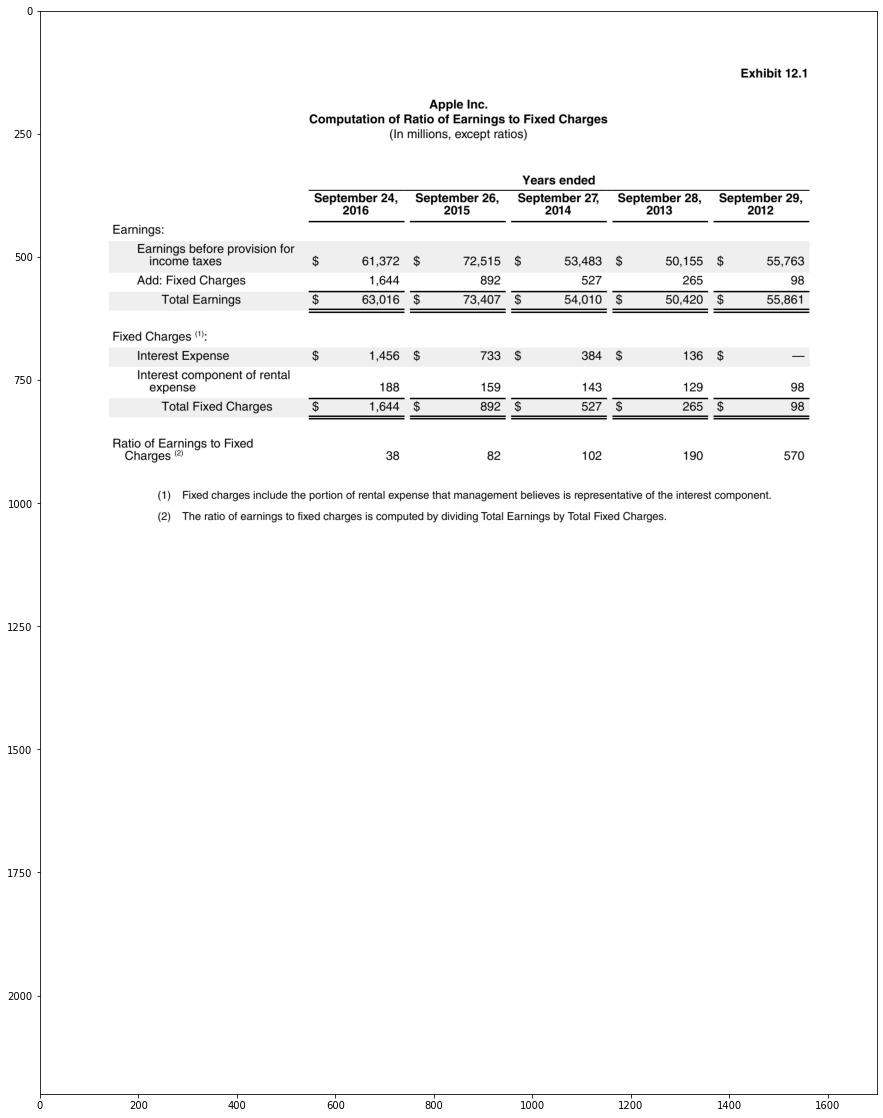

In [6]:
# image = cv2.imread("../Detectron/Report_pics_apple/out_98.png")
image = cv2.imread('Detectron/Report_pics_apple/out_98.png')

display_image(image)

C:\Users\SDS7695\AppData\Roaming\Python\Python37\site-packages\torch\_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ..\aten\src\ATen\native\BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
C:\Users\SDS7695\AppData\Roaming\Python\Python37\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Boxes(tensor([[ 147.7199,  597.4011, 1579.6063,  846.8317],
        [ 139.1961,  307.6020, 1578.2444,  619.3183]]))
7.33099627494812


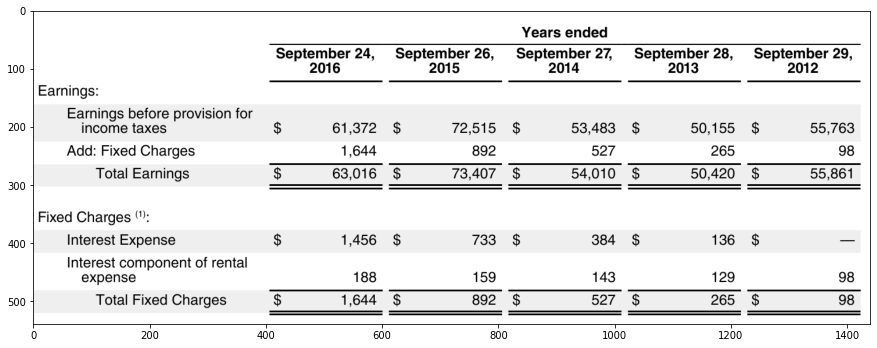

In [7]:
import time
t1 = time.time()
table_image = TableDetection().find_tables_in_image(image)
print(time.time()-t1)
display_image(table_image)

In [8]:
from table_extractor import TableExtractor
ex = TableExtractor()
ex.extract_table_data(table_image)

No of Tables : 1


,0,1,2,3,4,5,6
0,,,Years ended,,,NaN,NaN
1,"September 24, 2016","September 26, 2015","| September 27, 2014","| September 28, 2013","| September 29, 2012",NaN,NaN
2,,,,,,NaN,NaN
3,,,,,,NaN,NaN
4,"$ 61,372","$ 72,515","$ 53,483","$ 50,155","$ 55,763",NaN,NaN
5,"1,644",892,527,265,98,NaN,NaN
6,"'$ 63,016","$ 73,407","$ 54,010","$ 50,420","$ 55,861",NaN,NaN
7,,,,,,NaN,NaN
8,Interest Expense,"$ 1,456",$ 733),$ 384,$ 136,$ _—,NaN
9,Interest component of rental expense,,188,159,143,129,98


### Descriptive

In [13]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
im = cv2.imread("Images/borderless_table01.png")
outputs = predictor(image)
print(outputs["instances"].pred_classes)
print(outputs["instances"].scores)
print(outputs["instances"].pred_boxes)

tensor([0, 0])
tensor([0.9581, 0.9537])
Boxes(tensor([[ 147.7199,  597.4011, 1579.6063,  846.8317],
        [ 139.1961,  307.6020, 1578.2444,  619.3183]]))


In [14]:
boxes = outputs["instances"].pred_boxes
len(boxes)

2

In [16]:
def myfunc():
    return {}
DatasetCatalog.register("Table", myfunc)
MetadataCatalog.get("Table").set(thing_classes=["Table"])

metadata = MetadataCatalog.get('Table')

In [19]:
# We can use `Visualizer` to draw the predictions on the image.
# v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# cv2_imshow(out.get_image()[:, :, ::-1])

AssertionError: (975, 1443)

In [ ]:
im.shape

In [ ]:
display_image(out.get_image()[:, :, ::-1], (15, 20))